### **Tutorial 10: Word Embeddings**

In this tutorial, we will explore the concept of **Word Embeddings**, a technique to represent words as dense vectors in a continuous vector space. Word embeddings capture semantic meanings and relationships between words, enabling machines to understand and process natural language more effectively. These embeddings are a key component in various Natural Language Processing (NLP) applications, such as sentiment analysis, machine translation, and text generation.

---

#### **1. What Are Word Embeddings?**
Word embeddings are numerical vector representations of words that encode their semantic meaning. Unlike traditional one-hot encoding, which is sparse and lacks contextual meaning, word embeddings are dense and contain meaningful relationships between words.

- **One-Hot Encoding**:  
  A binary vector where each word is represented as a unique index. For example:  
  `["apple", "orange", "banana"] → [1, 0, 0] (for "apple")`  
  - **Problems**: High dimensionality, no semantic similarity captured.

- **Word Embeddings**:  
  Dense vectors that encode semantic meaning and relationships between words. For example:  
  `["apple"] → [0.9, 0.2, -0.1]`  
  - **Advantages**: Low dimensionality, meaningful relationships captured.

---

#### **2. Why Word Embeddings?**
1. **Semantic Relationships**: Words with similar meanings are closer in vector space.
   - Example: `"king" - "man" + "woman" ≈ "queen"`
2. **Low Dimensionality**: Dense vectors reduce memory usage and improve computational efficiency.
3. **Context-Aware**: Advanced embeddings like Word2Vec, GloVe, and BERT capture contextual meaning.

---

#### **3. Common Techniques to Generate Word Embeddings**

##### **a. Word2Vec**
A neural network-based method introduced by Google that learns word embeddings using:
- **CBOW (Continuous Bag of Words)**: Predict a word based on its context.
- **Skip-gram**: Predict context words given a word.

##### **b. GloVe (Global Vectors for Word Representation)**
A method that combines global word co-occurrence statistics to generate embeddings.

##### **c. FastText**
An extension of Word2Vec that represents words as n-grams, capturing subword information and handling rare words effectively.

##### **d. Pre-trained Models**
Modern embeddings like BERT, GPT, and embeddings derived from transformer models capture word context dynamically.

---

#### **4. Applications of Word Embeddings**
- **Sentiment Analysis**: Use embeddings to represent text for classifying sentiments.
- **Machine Translation**: Translate text by mapping embeddings between languages.
- **Recommendation Systems**: Use embeddings to find similar items based on descriptions.

---

#### **5. Challenges**
- **Out-of-Vocabulary Words**: Rare or unseen words may not have embeddings.
- **Context Independence**: Basic embeddings like Word2Vec don't account for word sense disambiguation.
- **Memory Usage**: Large embeddings can consume significant memory.


In [2]:
#### **4. Implementation of Word2Vec**
## Word2Vec using the **Gensim** library in Python.

from gensim.models import Word2Vec

corpus = [
    ["yangon", "is", "a", "city", "with", "a", "rich", "history"],
    ["bagan", "is", "famous", "for", "its", "ancient", "temples", "and", "pagodas"],
    ["the", "irrawaddy", "river", "is", "the", "lifeline", "of", "myanmar"],
    ["traditional", "foods", "like", "mohinga", "are", "popular", "in", "myanmar"],
    ["the", "shwedagon", "pagoda", "is", "a", "sacred", "site", "in", "yangon"],
    ["bamboo", "houses", "are", "common", "in", "rural", "areas", "of", "myanmar"],
    ["mandalay", "is", "known", "for", "its", "cultural", "heritage"],
    ["inle", "lake", "is", "famous", "for", "floating", "gardens", "and", "leg", "rowers"],
    ["kuthodaw", "pagoda", "is", "home", "to", "the", "world's", "largest", "book"],
    ["the", "thanaka", "paste", "is", "used", "as", "a", "traditional", "cosmetic", "in", "myanmar"]
]


model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, workers=4)

vector = model.wv['city']
print("Vector for 'city':", vector)

similar_words = model.wv.most_similar('city', topn=3)
print("Words similar to 'city':", similar_words)


Vector for 'city': [-0.01914128  0.01788287  0.0083197   0.01849578  0.01325819  0.00582918
  0.01962972 -0.00884563 -0.01364293  0.00840051  0.00747125 -0.01137113
  0.01942343 -0.0070883   0.01908592  0.00170001 -0.01264663 -0.00395273
 -0.01479022 -0.00597087  0.00209403  0.0189819   0.01872926 -0.0132062
  0.00695804  0.00454788 -0.00496564 -0.01841797  0.00204809 -0.01631597
  0.01262476 -0.011607    0.0110627   0.01966026 -0.00033688  0.00904931
 -0.00358805  0.01470079  0.00785726 -0.01801912 -0.00478067  0.00724616
 -0.00021617 -0.00243153 -0.00211752 -0.00335364  0.00120937  0.00833145
 -0.00848851 -0.00761731]
Words similar to 'city': [('bamboo', 0.30130815505981445), ('the', 0.2298237383365631), ('and', 0.2263408899307251)]


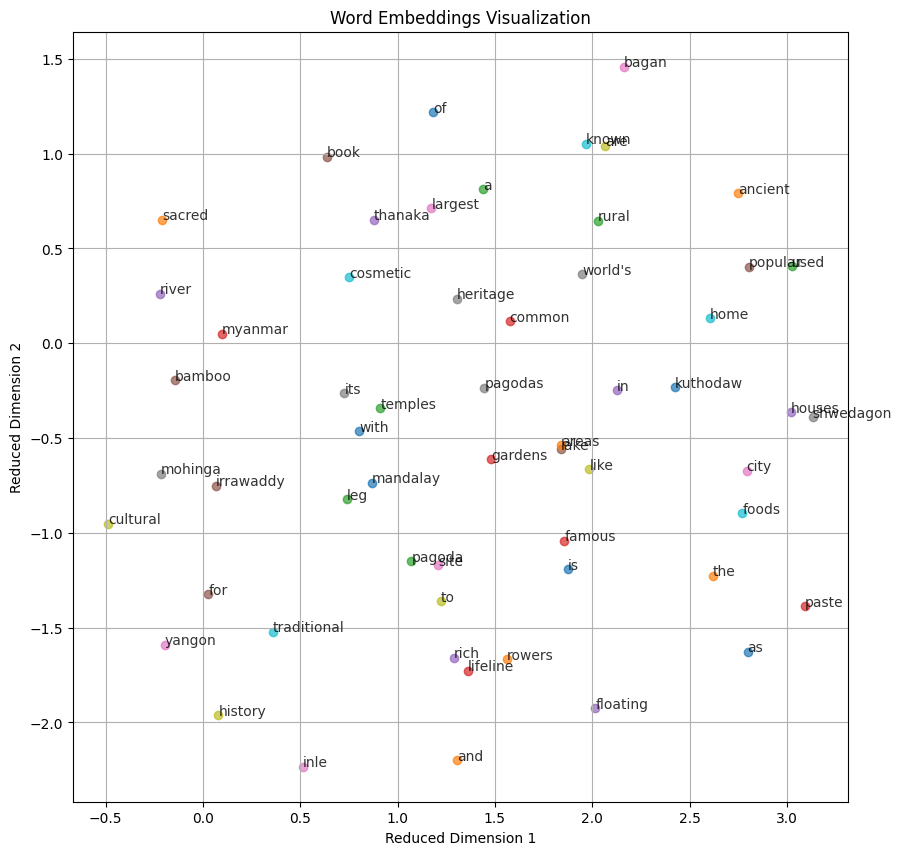

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 10))
for word, vector in zip(words, reduced_vectors):
    plt.scatter(vector[0], vector[1], alpha=0.7)
    plt.annotate(word, (vector[0], vector[1]), fontsize=10, alpha=0.8)

plt.title("Word Embeddings Visualization")
plt.xlabel("Reduced Dimension 1")
plt.ylabel("Reduced Dimension 2")
plt.grid(True)
plt.show()


### **`torch.nn.Embedding`**

The `nn.Embedding` layer in PyTorch is used to map discrete integers (like word indices) to dense vectors of fixed size. It acts as a lookup table that stores embeddings (dense representations) for each index in the vocabulary.

- **Random Initialization**: The `nn.Embedding` layer starts with a randomly initialized embedding matrix, meaning the vectors assigned to tokens initially have no semantic meaning.

- **Trainable Weights**: During training, the embedding matrix is updated via backpropagation to learn meaningful representations of the tokens in the context of the specific task (e.g., text classification, language modeling).

- **Token-Specific Lookups**: The embedding layer retrieves the rows corresponding to the token indices, ensuring that each token gets its specific dense representation.



In [4]:
import torch
import torch.nn as nn

from utils.tokenizer import CharTokenizer, WordTokenizer

text_paragraph = """
You are a manufacturer of hip implants. The doctor who will use your implants in surgeries has a requirement: he is willing to accept implants that are 1 mm bigger or smaller than the specified target size. This means the implant sizes must fall within a 2 mm range of the target size, i.e., ±1 mm from the target.
Additionally, your financial officer has stated that in order to maintain profitability, you can afford to discard **1 out of every 1000 implants**. This means that the size distribution of your implants must be such that only 0.1% of implants fall outside the acceptable ±1 mm range.
Given a recent sample of 1000 implants from the factory, the task is to evaluate whether the factory is meeting the specified quality and profitability requirements. If more than one percent of the implants fall outside the ±1 mm range, the factory will incur a loss due to excess waste.
"""

tokenizer = WordTokenizer.train_from_text(text_paragraph)
vocab_size = tokenizer.vocabulary_size()
print(f"Vocabulary size: {vocab_size}")

text_input = "Given a recent sample of "
input_tokens = tokenizer.encode(text_input)
print(f"Ecoded Vector of 'Given a recent sample of ' is: {input_tokens}")


embedding_dim = 4
embedding_layer = nn.Embedding(vocab_size, embedding_dim)
output_embeddings = embedding_layer(input_tokens)

print(f"Text input: {text_input}")
print("Input tokens:", input_tokens)
print("Embedded vector:", output_embeddings)

Vocabulary size: 96
Ecoded Vector of 'Given a recent sample of ' is: tensor([ 6, 11, 66, 69, 51])
Text input: Given a recent sample of 
Input tokens: tensor([ 6, 11, 66, 69, 51])
Embedded vector: tensor([[-1.6489, -0.0805, -0.6936,  1.2359],
        [ 0.1176,  0.4656,  0.3106,  1.0813],
        [-0.1752,  0.0540, -0.8470, -1.5525],
        [ 0.3119, -0.0818,  0.4581,  0.0212],
        [-0.5187,  0.7026, -0.0172, -1.4737]], grad_fn=<EmbeddingBackward0>)


### **Explanation of nn.Embedding Layer**

#### 1. Vocabulary Encoding
The vocabulary size is 96. Each word or token in the input text is assigned a unique index (integer ID) in the range [0, 95].

For the input phrase "Given a recent sample of", the tokenizer maps the words to their indices as follows:

- "Given" -> 6  
- "a" -> 11  
- "recent" -> 66  
- "sample" -> 69  
- "of" -> 51

#### 2. Input to the Embedding Layer
The indices [6, 11, 66, 69, 51] are fed into the `nn.Embedding` layer. The layer contains a trainable embedding matrix of shape (vocabulary_size, embedding_dim):

- 96 rows: One for each token in the vocabulary.
- 4 columns: Representing the `embedding_dim` (size of each token's vector).

#### 3. Lookup Operation
When the input indices [6, 11, 66, 69, 51] are passed to the embedding layer, it performs a lookup in the embedding matrix. Specifically:

- Index 6 retrieves the 6th row of the matrix.
- Index 11 retrieves the 11th row, and so on.

Example lookups:

- `embedding_matrix[6]` -> `[-0.7583, 0.9922, 1.8787, 3.0013]`
- `embedding_matrix[11]` -> `[-0.0526, 1.0764, -0.5330, -1.4174]`

#### 4. Embedded Vector Output
The output is a tensor of shape is `(number of tokens, embedding_dim)`
```
tensor([[-0.7583,  0.9922,  1.8787,  3.0013],  # "Given"
        [-0.0526,  1.0764, -0.5330, -1.4174],  # "a"
        [ 0.2218, -1.2806, -0.2778, -0.3278],  # "recent"
        [ 0.2442, -1.1955,  0.5330, -0.7915],  # "sample"
        [ 0.8490,  1.0200, -1.4119, -1.9483]]) # "of"

```
---


### Positional Embedding Explanation

In transformer models, positional embeddings are used to encode the position of each token in the input sequence. Since transformers process the entire input sequence at once (in parallel), they don't inherently capture the order of tokens, unlike RNNs or LSTMs, which process tokens sequentially. To overcome this, we add positional embeddings to the input token embeddings, allowing the model to learn and understand the order of tokens in the sequence.

**Positional embeddings** are trainable parameters, just like token embeddings, and they are updated during training through backpropagation. Their primary role is to help the model understand the relative or absolute positions of tokens in a sequence, which is essential for sequence-based tasks.

In [5]:
embedding_dim = 4
embedding_layer = nn.Embedding(vocab_size, embedding_dim)
token_embeddings = embedding_layer(input_tokens)


context_size = len(input_tokens) 
positional_embedding_layer = nn.Embedding(context_size, embedding_dim)
positions = torch.arange(context_size).long()  
positional_embeddings = positional_embedding_layer(positions)


# Add token embeddings and positional embeddings to get the final embeddings
final_embeddings = token_embeddings + positional_embeddings

print(f"Text input: {text_input}")
print("Input tokens:", input_tokens)
print("Token embeddings:\n", token_embeddings)
print("Positional embeddings:\n", positional_embeddings)
print("Final embeddings (Token + Positional):\n", final_embeddings)

Text input: Given a recent sample of 
Input tokens: tensor([ 6, 11, 66, 69, 51])
Token embeddings:
 tensor([[ 0.6449,  1.8443, -0.2205, -0.3549],
        [-0.9888,  0.0404,  0.6233, -1.6304],
        [-1.0909,  0.4442, -0.0180,  0.4646],
        [-1.0776,  1.4304, -0.5432,  1.1189],
        [-1.8506, -1.7559, -0.6753, -0.2021]], grad_fn=<EmbeddingBackward0>)
Positional embeddings:
 tensor([[-1.2944, -0.9743,  1.0773, -1.0924],
        [-1.2088,  0.5331,  1.0797, -1.2034],
        [-0.5792,  0.7824,  0.2055, -0.5370],
        [-0.2994,  0.6634, -1.5933, -0.5986],
        [ 1.4249, -1.4180, -2.0618, -0.1606]], grad_fn=<EmbeddingBackward0>)
Final embeddings (Token + Positional):
 tensor([[-0.6495,  0.8700,  0.8568, -1.4473],
        [-2.1977,  0.5735,  1.7030, -2.8339],
        [-1.6701,  1.2267,  0.1875, -0.0724],
        [-1.3770,  2.0938, -2.1365,  0.5203],
        [-0.4256, -3.1739, -2.7371, -0.3627]], grad_fn=<AddBackward0>)
